# Introdução ao problema de Feature Scaling

Durante a tarefa de Aprendizagem de Máquina, de vez em quando nos deparamos com a necessidade trabalhar com as variaveis em uma mesma escala. Para isso, algumas técnicas foram desenvolvidas com esse intuito, vamos listar algumas:

- **Normalização (MinMaxScale):** Método para transformar os dados para o intervalo [0,1];

- **Padronização:** Método que utiliza-se de conceitos estatísticos para a padronização da variável para um normal com média 0 e variância 1.

# Porque devemos fazer o processo de Scaling ?

Vamos por em um problema real, digamos que temos duas variáveis com escalas bem distintas, dispostas da seguinte forma:

| NOME | preço (R$) | peso (kg) | quantidade (u.n) | taxa (0,1) |
|------|------------|-----------|------------------|------------|
| A    | 728        | 44        | 3                | 0.15       |
| B    | 329        | 27        | 7                | 0.33       |
| C    | 1320       | 73        | 9                | 0.58       |

Perceba que temos **4 variáveis**, e todas as 4 com escalas distintas. Nós, humanos, sabemos que peso, preço e quantidade representam aspectos diferentes e, por isso, interpretamos cada uns desses dados de maneira distinta. Entretanto, alguns algoritmos não conseguem interpretar o contexto de cada variável e veem, por exemplo, um preço de 10 reais do mesmo modo que um peso de 10kg. Consequentemente, quando uma variável está representada numa escala maior, acaba recebendo mais importância na hora de gerar um modelo.

Além disso, alguns algoritmos de **ML** trabalham de forma mais lenta quando temos escalas diferentes, em especial aqueles que trabalham com **distâncias**. Para resolver esses problemas, utilizamos o processo de Feature Scaling, em que essas multiplas escalas são transformadas para uma escala padrão, sendo essa escala definida pelo processo de Scaling que foi utilizado.


![img](https://miro.medium.com/max/700/1*_783tuRRVcTUwyFWB8VG0g.png)

Como dito antes, algoritmos que utilizam distâncias entre pontos, como o **K-Nearest Neighbors** e **Support Vector Machines**, são beneficiados quando se faz uso de técnicas de normalização. Além disso, o Scaling garante uma descida mais suave do **Gradiente Descendente** até o seu ponto mínimo. Assim, algoritmos que utilizam dessa técnica de otimização, como as **Redes Neurais** e a **Regressão Linear**, também tem seu desempenho melhorado. Outra técnica em que o Scaling é essencial é o **PCA** (Principal Component Analysis), que é muito sensível a mudanças de escala, pois trabalha na identificação das direções de máxima variância.

Entretanto, algoritmos como os de decisão não são afetados por essas técnicas, visto que se utilizam de uma série de regras para funcionar, que não afetadas pelas escalas das variáveis. Alguns exemplos de algoritmos desse tipo são: **Random Forests** e **Gradient Boosted Decision Trees**. Além deles, certos algoritmos já lidam com as diferenças de escalas através da definição de pesos, como acontece com o **Naive Bayes**.



## Padronização 

O feature scaling basicamente transforma os dados para a mesma proporção, a mesma escala. É uma etapa muito importante no pré-processamento para melhorar a performance do modelo. Na padronização os dados são escalados para terem $média = 0$ e $variância = 1$. E para isso usamos a função `StandardScaler`.

Para ilustrar, vejamos os exempos a seguir, primeiro vamos importar o que será necessário:

### Importações necessárias

In [1]:
import numpy as np  
import pandas as pd                                    # para cálculos
import matplotlib.pyplot as plt                         # para visualização
from sklearn.datasets import load_boston                # conjunto de dados
from sklearn.model_selection import train_test_split    # divisão de dados
from sklearn.preprocessing import StandardScaler        # padronização

### Exemplo básico

Vamos gerar um conjunto de dados aleatórios para ilustrar a padronização

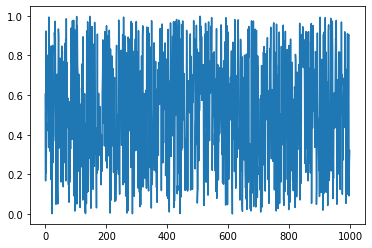

In [11]:
data = np.random.rand(1000)
plt.plot(data)
plt.show()

Utilizaremos a classe de padronização do sklearn: `StandardScaler`. Ela segue a mesma lógica das demais classes do sklearn (fit, transform, fit_transform, etc).

No caso desse conjunto de dados, precisamos remodelar pois eles estão no formato $(x,)$ e precisamos que fiquem $(1,x)$ para que possam ser utilizados pelo `StandardScaler`. 

Então vamos remodelar (`reshape`) e inverter a ordem da matriz, ou seja, obter a transposta da mesma.

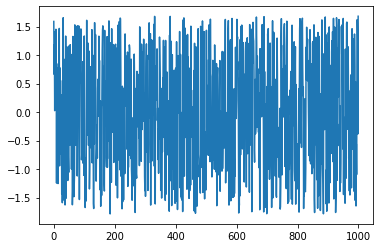

In [10]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data.reshape(1,-1).T)
plt.plot(new_data)
plt.show()

Compo podemos observar através dos eixos e da própria figura, o conjunto de dados foi transferido para outra localização, porém permanece com o mesmo aspecto. 

Para conferir se a operação foi um sucesso em mais detalhes, podemos utilizar os atributos $mean$ e $std$, para verificar respectivamente, a média e o desvio padrão do conjunto de dados.

In [4]:
print('média:',new_data.mean(axis = 0))
print('desvio padrão:',new_data.std(axis = 0))

média: [2.93098879e-16]
desvio padrão: [1.]


Opa, parece que a média não é exatamente zero. Isso se dá porque os números do conjunto de dados são `floats` de precisão dupla. Ainda assim, na prática, podemos considerar que `[-1.59872116e-16]` é muito próximo de zero. 

Porém, é claro, depende do tipo de aplicação que vocês estão trabalhando, se for algo que necessite de mais precisão e vocês não possam realizar esse arredondamento, existem técnicas estatísticas para isso. Mas no nosso caso é suficiente. $:)$

### Toy problem

Vamos utilizar o famoso dataset do preço das casas de Boston para observar a atuação do `StandardScaler`, esse dataset possui uma grande diversidade nas escalas das variáveis.

In [5]:
from sklearn.datasets import load_boston                  #Importamos o banco de dados
df = load_boston()
X = pd.DataFrame(df.data, columns=df.feature_names)       #Transformamos o numpy array para pandas DataFrame, para facilitar a visualização dos dados
y = pd.DataFrame(df.target)
X.describe()                                              #Descrevemos o DataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


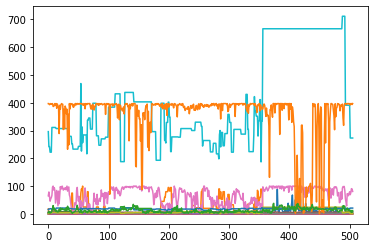

In [9]:
plt.plot(X)  #Plotamos o gráfico para visualizar as escalas dos dados
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler                                #Importamos o StandardScaler para padronizar os dados
scaler = StandardScaler()                                                      
Xscaled = pd.DataFrame(scaler.fit_transform(X), columns=df.feature_names)       #Padronizamos os dados
Xscaled.describe()                                                              #Por fim, descrevemos os dados para visualizar a mudança no dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


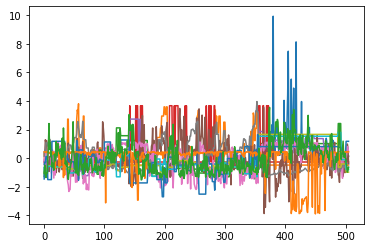

In [12]:
plt.plot(Xscaled)       #Plotamos o gráfico para visulizar a distribuição dos dados
plt.show()

Agora vamos mostrar como o Feature Scaling, especificamente o `StandardScaler` pode melhorar o desempenho de um modelo de Machine Learning. Para isso, usaremos um problema de classificação, o Make_Blobs. 

Observação: O Make_Blobs é uma ferramenta que gera diferntes bancos de dados para cluter/agrupamento. Ele varia o dataset formado conforme o número de features, samples, entre outros parâmetros. 

In [13]:
from sklearn.datasets import make_blobs
Xblob, yblob = make_blobs(n_samples = 1000, centers =[(100, 100), (200, 200)], cluster_std= [120, 120], random_state=1)
Xblob1 = pd.DataFrame(Xblob)
Xblob1

,0,1
0,66.898472,247.474670
1,119.759808,193.380901
2,261.729387,197.929896
3,38.923327,80.021685
4,84.636344,28.758125
...,...,...
995,-47.606976,166.064500
996,149.855526,92.374450
997,-28.755713,159.419033
998,134.270479,206.216940


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xblob, yblob, test_size=0.3, random_state=1)

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       157
           1       0.69      0.65      0.67       143

    accuracy                           0.70       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300



In [18]:
print (svc.score(X_train, y_train))

0.7257142857142858


In [19]:
scaler = StandardScaler()                                                      
X_scaled = scaler.fit_transform(Xblob1) 

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, yblob, test_size=0.3, random_state=1)

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
ypred = svc.predict(Xtest)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       157
           1       0.69      0.65      0.67       143

    accuracy                           0.70       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300



In [24]:
print(svc.score(Xtrain, ytrain))

0.7285714285714285



## Normalização

Como outro passo para o pré-processamento de dados, o MinMax Scaling representa uma técnica para tratar os dados a partir da redução da sua escala para uma pré definida. O objetivo, então, é que uma característica do dataset não desbalanceie o treinamento por estar com a escala fora de um intervalo razoável dado o dataset. 


Todo esse processo é chamado de normalização, a qual é definida pela definição de dois limites como o mínimo e máximo da escala. De modo geral, esse range pré definido fica entre [0,1] e não tem impacto nas distribuições das distâncias dos dados.


As variáveis usadas para determinar as variáveis target (alvo) são denominadas "Features". 

Logo, para pôr em prática a técnica, é dada a fórmula:

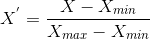, tal que:

 Xmin = valor mínimo


Xmax = Valor máximo

 Quando o valor de X é o valor mínimo na coluna, o numerador será 0 e, portanto, X' = 0.


Por outro lado, quando o valor de X é o valor máximo na coluna, o numerador é igual ao denominador e, portanto, o valor de X' é 1.


Se o valor de X estiver entre o valor mínimo e máximo, então o valor de X' está entre 0 e 1

## Importações das Bibliotecas



In [25]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cenário Inicial

Para entender a ideia central, é necessário observar a implementação em um cenário mais adequado.


Para isso, usou-se o gerador de amostrar do Sci-kit Learn, make_blobs, para gerar um conjunto de dados de 100 amostras, com dois centróides e desvio padrão configurados no código a seguir.

In [26]:
from sklearn.datasets.samples_generator import make_blobs
X_blob, y_blob = make_blobs(n_samples = 100, centers =[(50, 50), (25, 25)], cluster_std= [30, 30], random_state=1)
data = pd.DataFrame(Xblob)
data.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


,0,1
0,66.898472,247.474670
1,119.759808,193.380901
2,261.729387,197.929896
3,38.923327,80.021685
4,84.636344,28.758125


In [32]:
data.describe()

,0,1
count,1000.000000,1000.000000
mean,154.740220,153.196330
std,130.658585,130.232353
min,-266.451726,-234.919569
25%,68.003692,64.078652
50%,152.771847,154.593587
75%,239.830842,234.710790
max,525.433985,611.919612


Ao plotar o gráfico desses dados, consegue perceber que a escala das 100 amostras varia entre -40 e 120

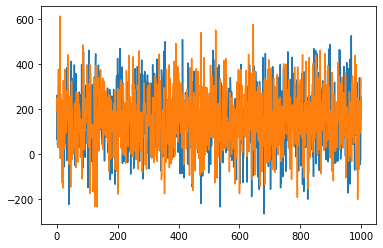

In [28]:
plt.plot(data)
plt.show()

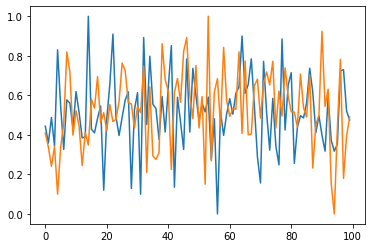

In [33]:
scaler = MinMaxScaler()
scaler.fit(X_blob)
data_scaled = scaler.transform(X_blob)
plt.plot(data_scaled)

E, agora sim, tem-se o mesmo conjunto de dados com as mesmas proporções entre os valores das suas variáveis, porém condensada em uma escala bem mais reduzida, entre 0 e 1. 

:)

Ainda, para fins de comparação, em um gráfico de dispersão nota-se o método com ainda mais clareza

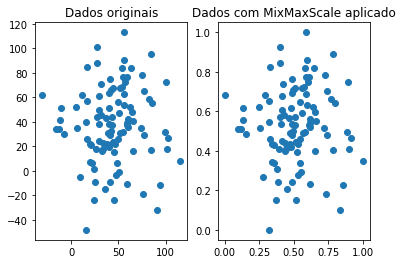

In [36]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X_blob[:,0], X_blob[:,1])
axes[0].set_title("Dados originais")
axes[1].scatter(data_scaled[:,0], data_scaled[:,1])
axes[1].set_title("Dados com MixMaxScale aplicado")
plt.show()

## Toy Problem





Para fins didáticos de comparação e didáticos dado que essa técnica anda junto com a Padronização, foi utilizado o mesmo Dataset. Então, importa-se o banco de dados do mercado imobiliário do subúrbio de Boston.

In [38]:
from sklearn.datasets import load_boston
df = load_boston()
data_x = pd.DataFrame(df.data, columns=df.feature_names)
data_y = pd.DataFrame(df.target)
data_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


E ao se plotar o gráfico, consegue-se ter noção da distribuição dos dados ao longo da escala inserida. 

Percebe-se que a escala de algumas variáveis tem grande diferença em relação às pares analisadas.

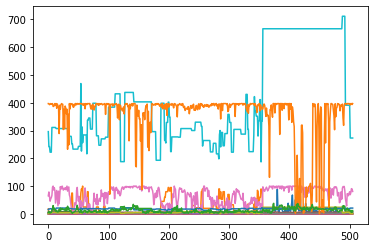

In [39]:
plt.plot(X)
plt.show()

Agora, ao aplicar a normalização, os dados estão na mesma escala (entre 0 e 1)

Por mais que a visualização desses dados por meio do gráfico gerado não agregue, o uso dos dados nesse formato contribui para a melhora do treinamento do modelo.

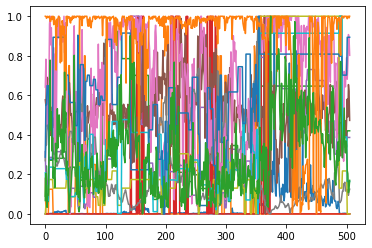

In [41]:
scaler = MinMaxScaler()
scaler.fit(data_x)
scaled_data = scaler.transform(data_x)
plt.plot(scaled_data)
plt.show()

# Referencias:
[https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)

[https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

[https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing](https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing)

[https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832](https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832)

[https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)[https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79](https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79)

[https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

[https://towardsdatascience.com/clearly-explained-what-why-and-how-of-feature-scaling-normalization-standardization-e9207042d971](https://towardsdatascience.com/clearly-explained-what-why-and-how-of-feature-scaling-normalization-standardization-e9207042d971)